   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

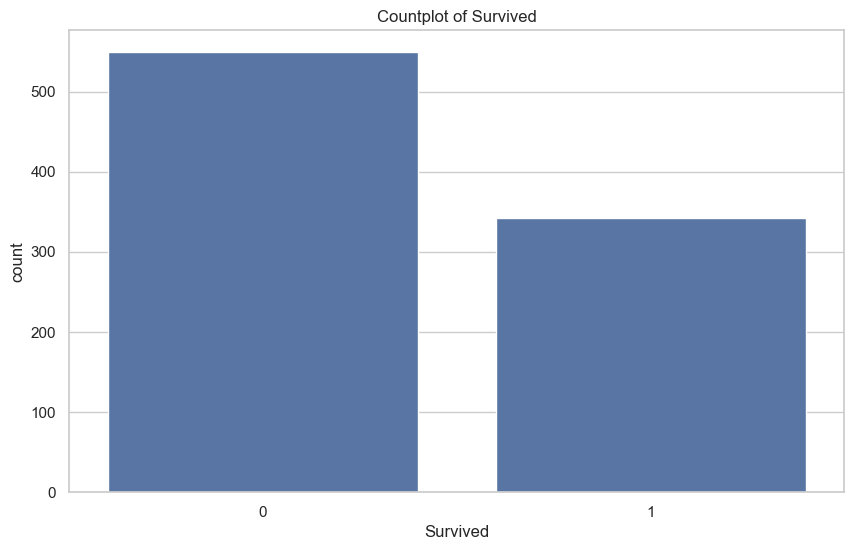

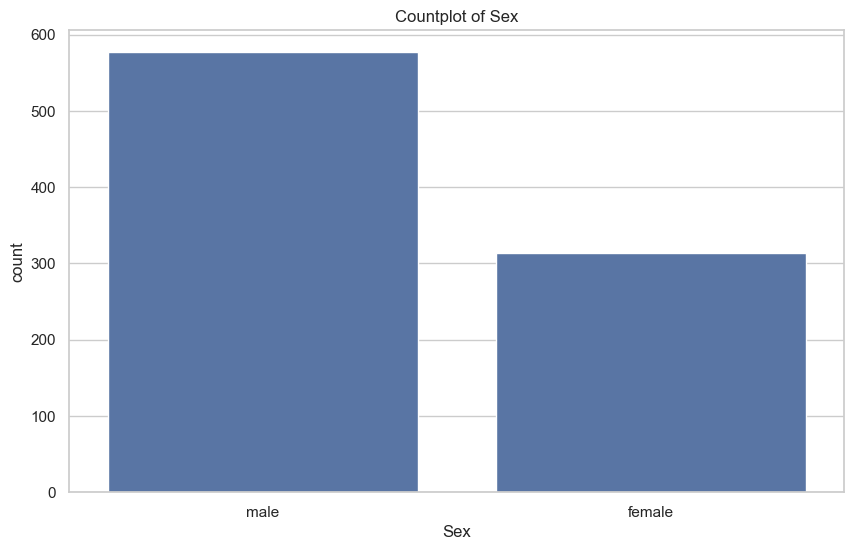

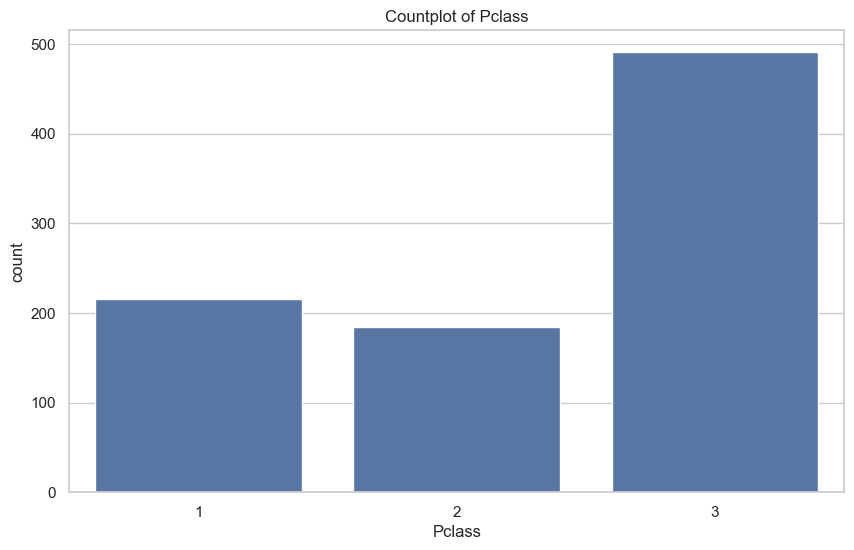

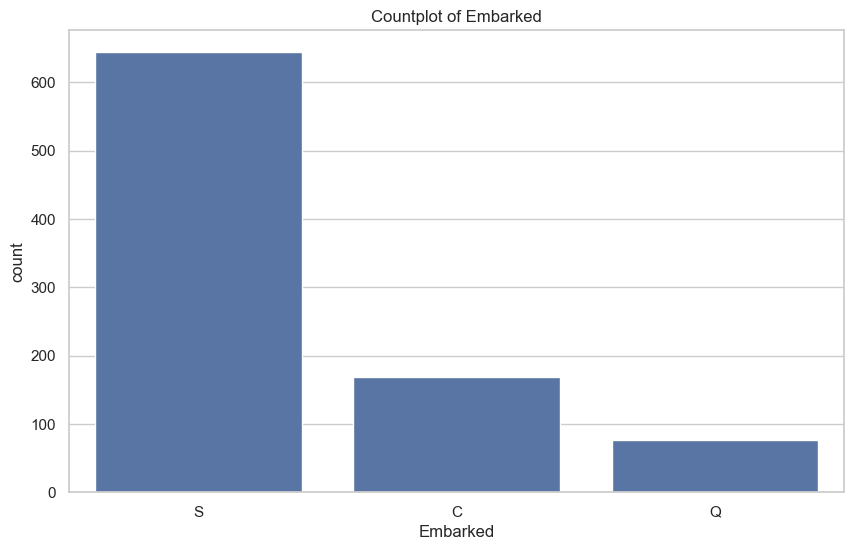

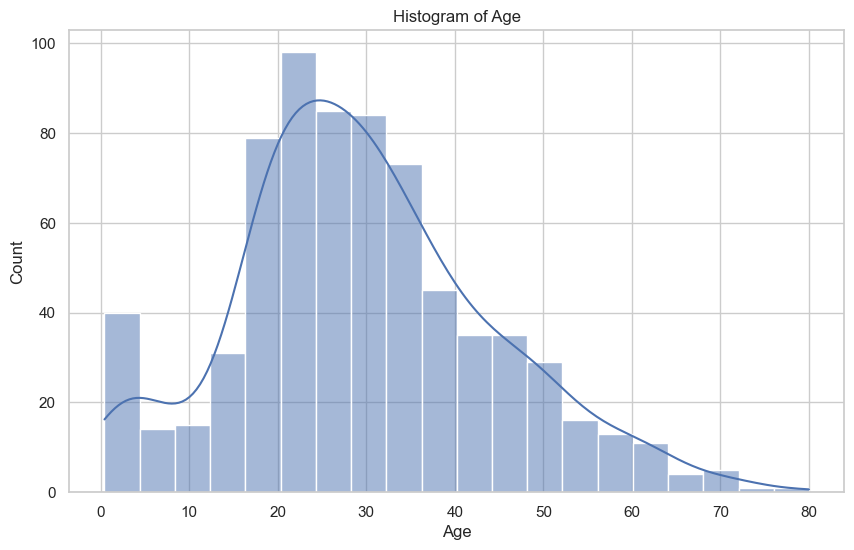

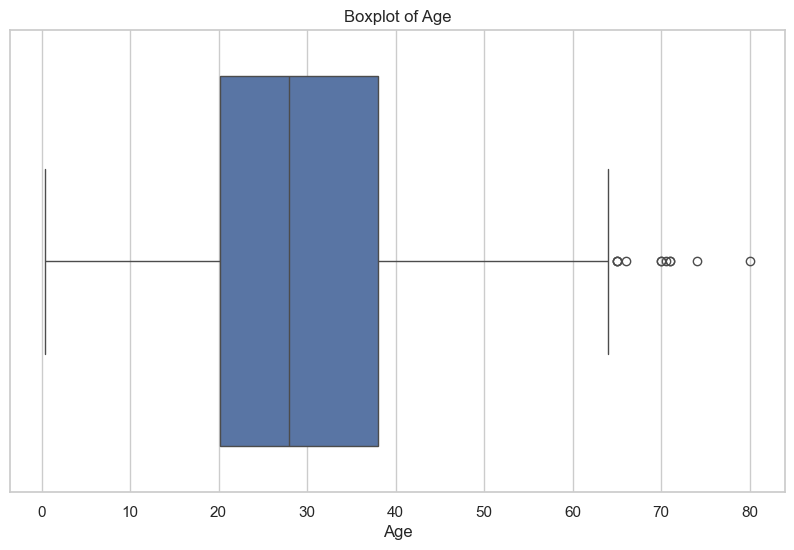

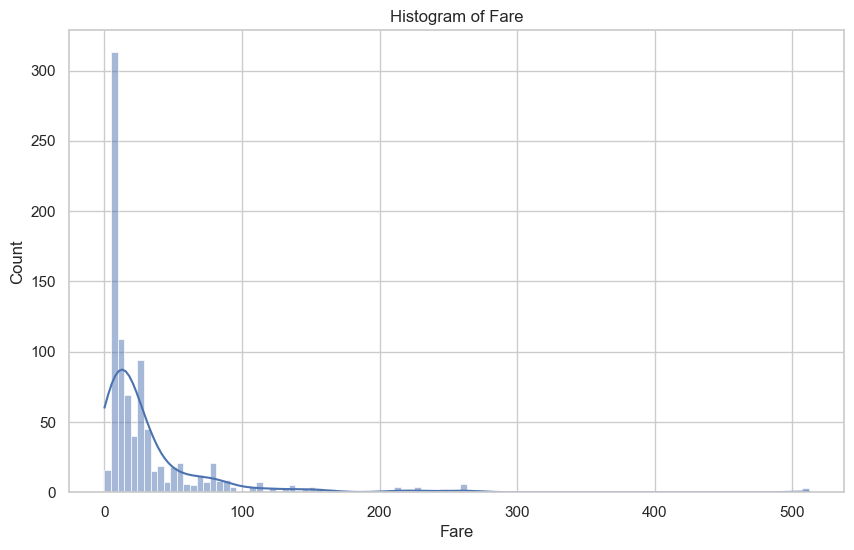

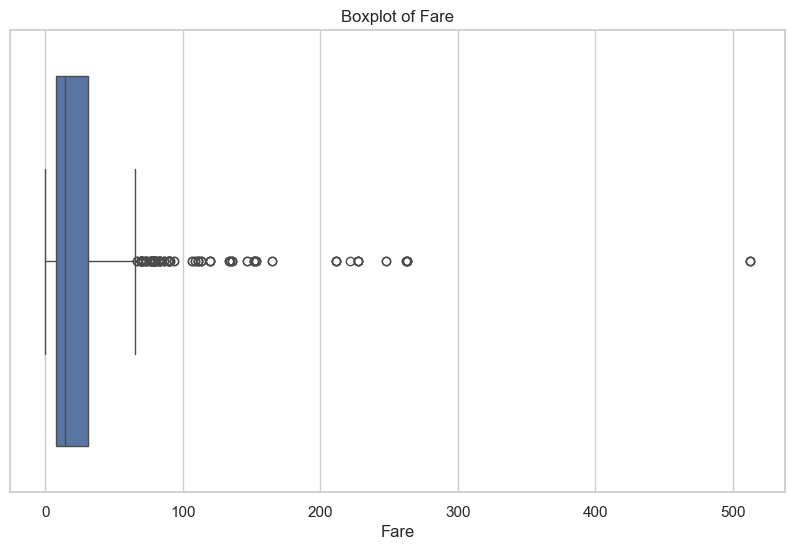

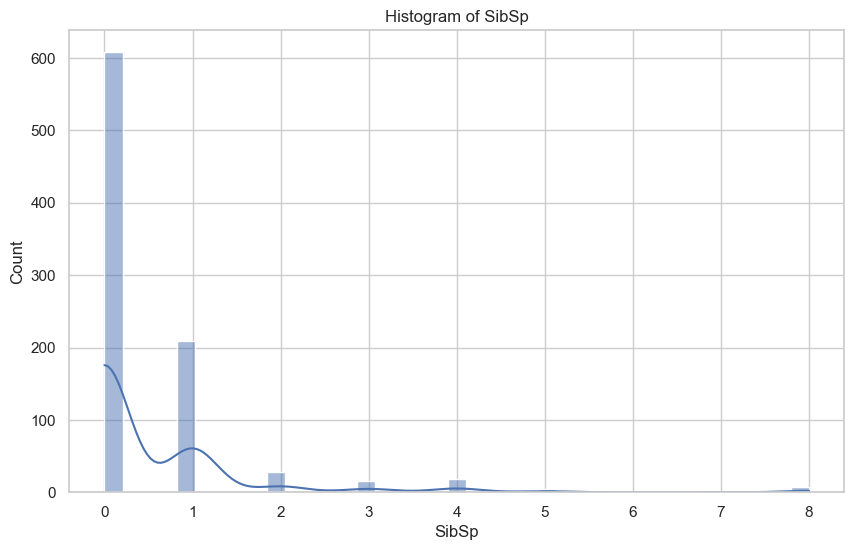

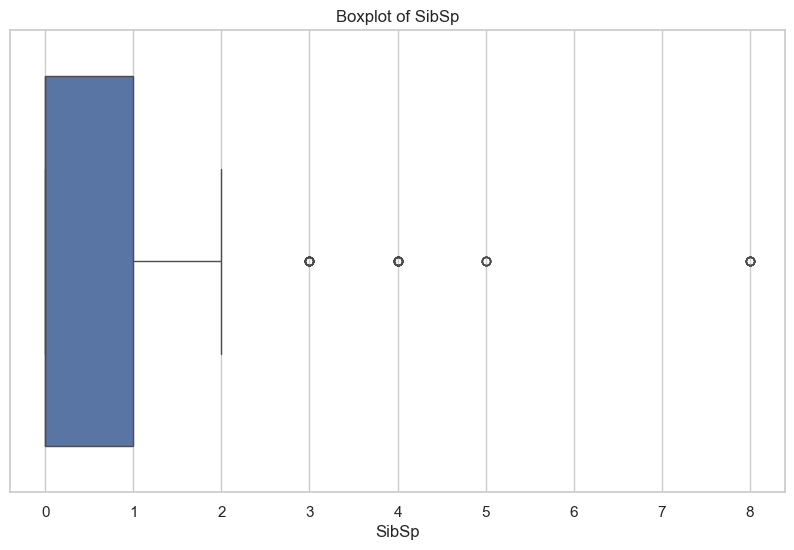

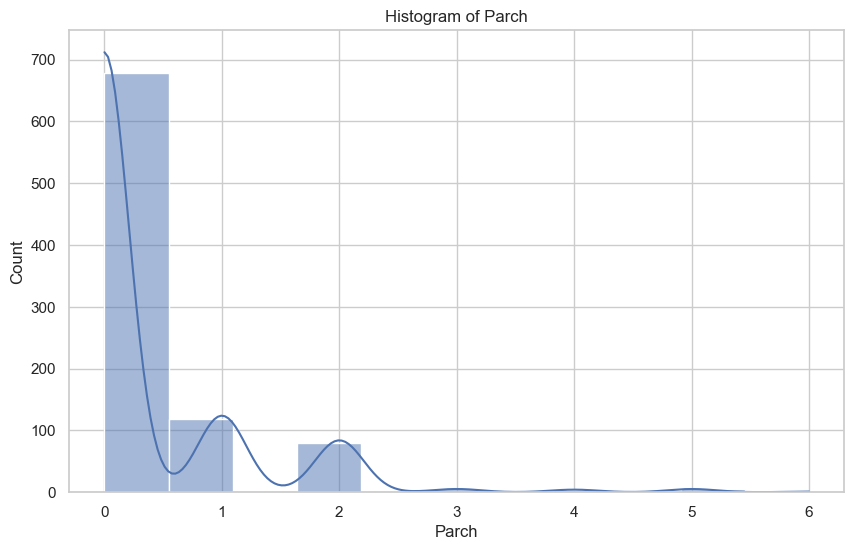

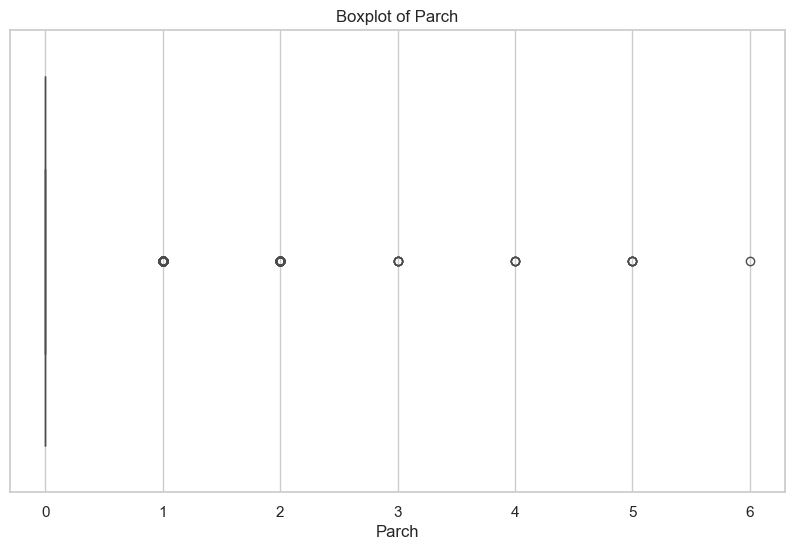

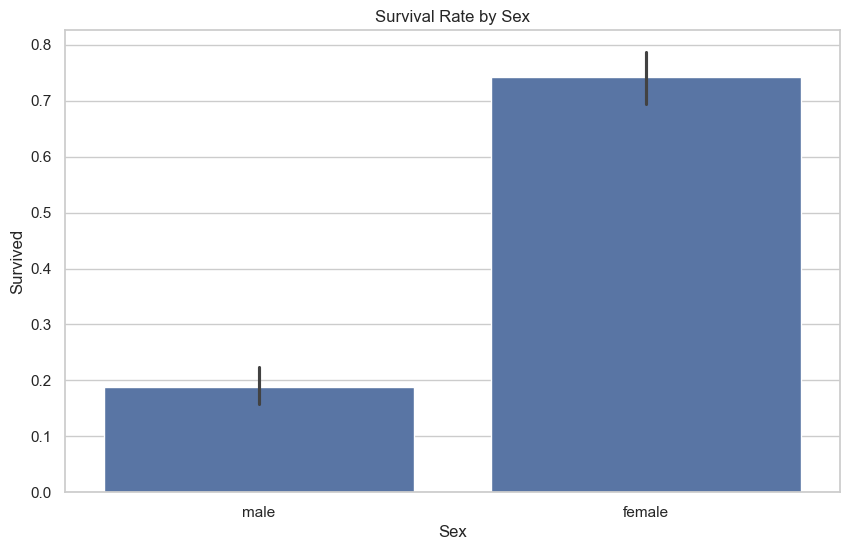

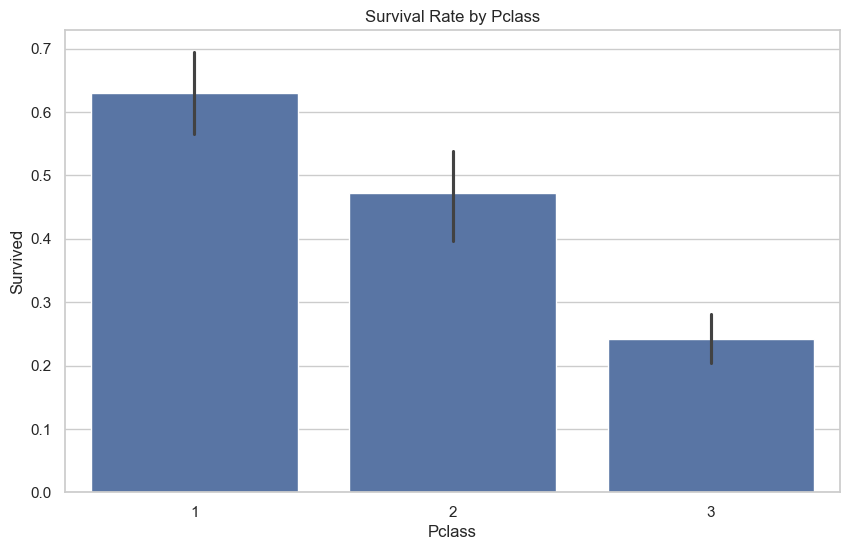

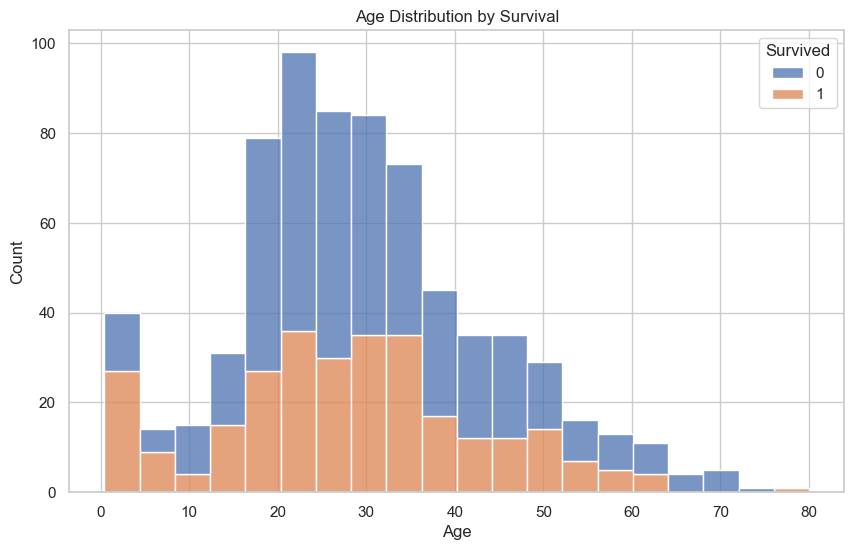

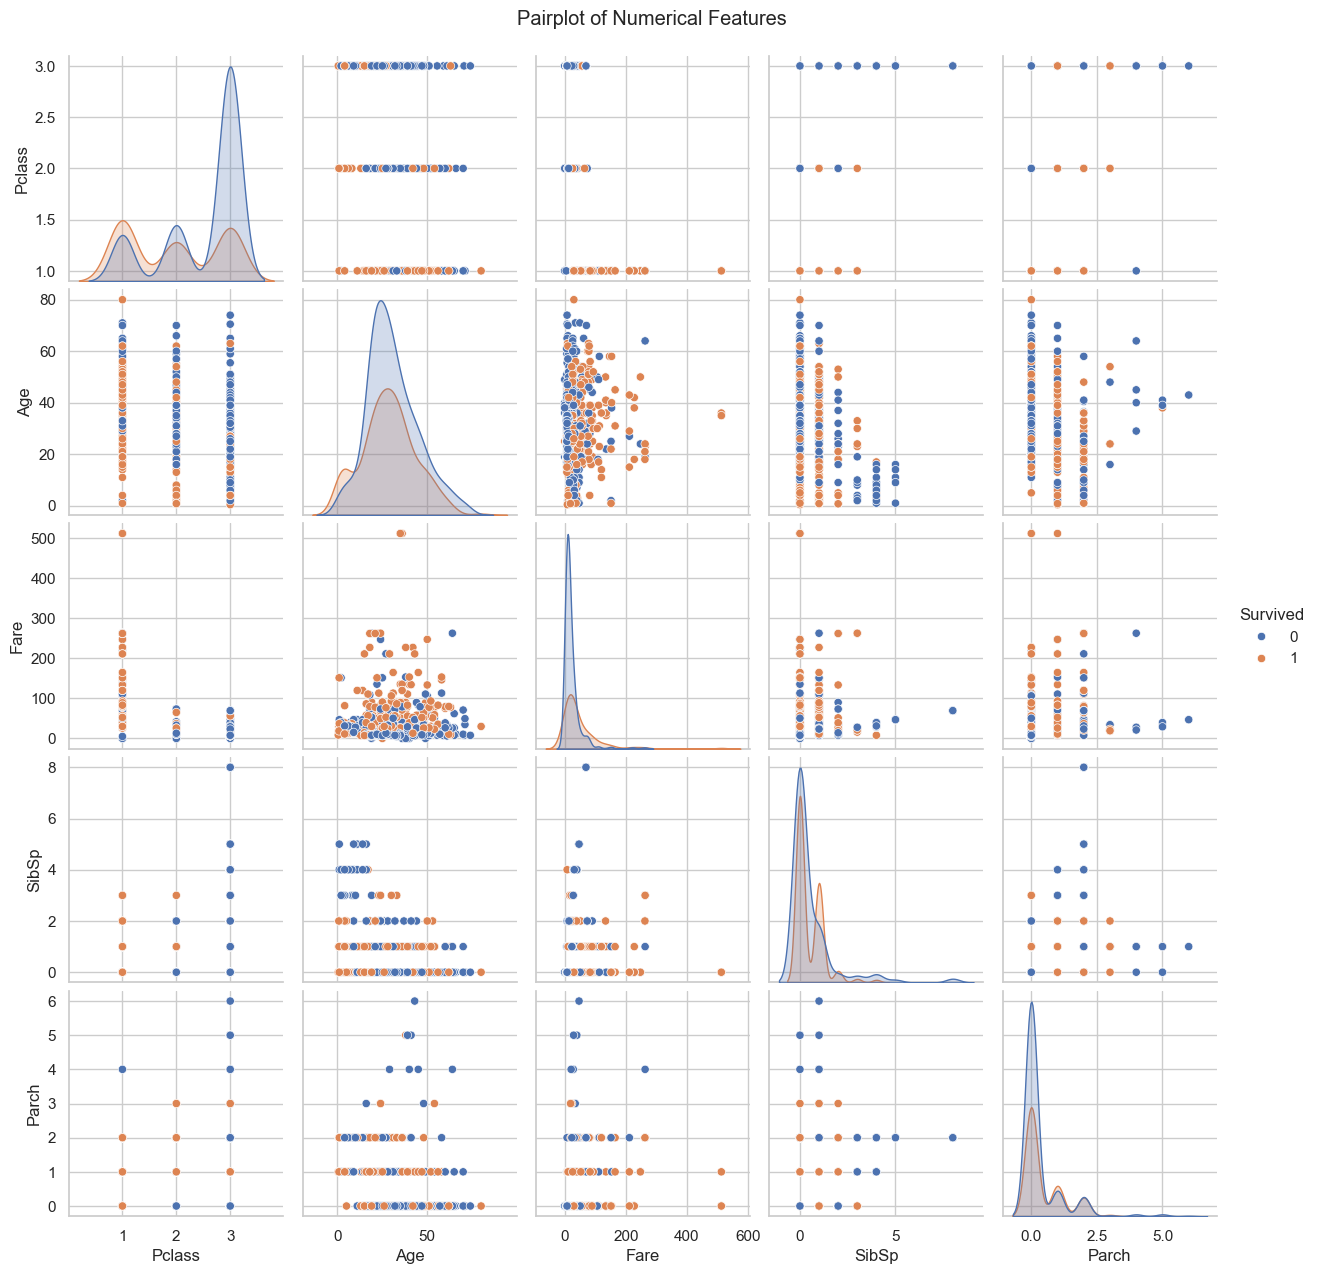

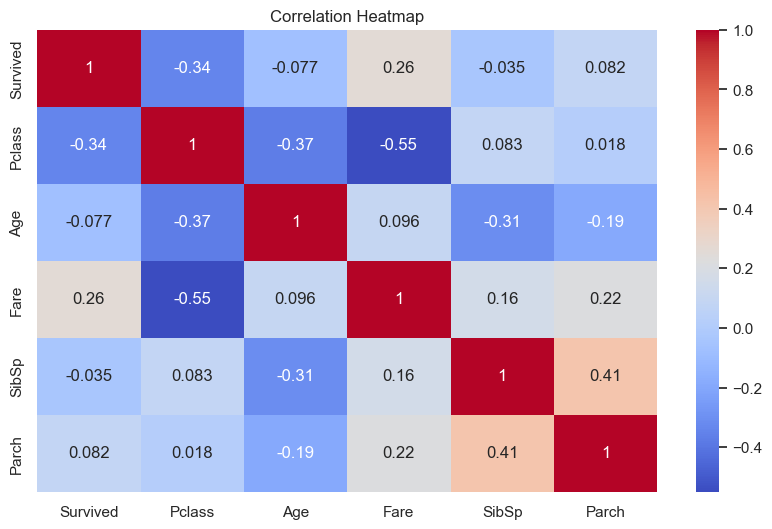

'\nOBSERVATIONS:\n- Females had a significantly higher survival rate than males.\n- Passengers in 1st class were more likely to survive.\n- Younger passengers (especially kids) had better chances.\n- Fare has some positive correlation with survival — higher fare, more survival.\n- Strong correlation between SibSp and Parch (family size features).\n'

In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 2. Load Data
df = pd.read_csv("train.csv")

# 3. Data Overview
print(df.head())
print(df.info())
print(df.describe(include='all'))

# 4. Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# ---------------------------
# 5. Univariate Analysis
# ---------------------------

# Categorical: Survived, Sex, Pclass, Embarked
for col in ['Survived', 'Sex', 'Pclass', 'Embarked']:
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

# Numerical: Age, Fare, SibSp, Parch
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# ---------------------------
# 6. Bivariate Analysis
# ---------------------------

# Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

# Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()

# Pairplot (on selected features)
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation Heatmap
corr = df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------
# 7. Observations (add in markdown or as comments in PDF)
# ---------------------------
"""
OBSERVATIONS:
- Females had a significantly higher survival rate than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers (especially kids) had better chances.
- Fare has some positive correlation with survival — higher fare, more survival.
- Strong correlation between SibSp and Parch (family size features).
"""

# ---------------------------
# 8. Optional: Handling Missing Values (if preprocessing needed)
# ---------------------------
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# df.drop('Cabin', axis=1, inplace=True)  # Too many missing values

